**Predict which traveler type (Solo, Couple, Family, Friends) an activity is suited 
for based on activity features**

**SmartVoyage AI: An Intelligent Travel Concierge System**

An AI-driven system that recommends personalized travel experiences based on user preferences and traveler profiles.

In [1]:
# Project: SmartVoyage AI - Travel Concierge System
# Dataset: smartvoyage AI.csv
# Objective: Predict traveler types (Solo, Couple, Family, Business, etc.)
# and recommend personalized travel packages.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('smartvoyage_AI.csv')
df

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency    Age_Group  Season Preferred_Activity  \
0              1.159823        Adult  Autumn             Hiking   
1              0.000000        Adult  Autumn              Beach   
2              2.867319  Young Adult  Summer                Spa   
3              4.013714        Adult  Autumn             Museum   
4              2.381564        Youth  Spring             Museum   
...                 ...          ...     ...                ...   
11995          1.767012  Young Adult  Summer             Museum   
11996          1.803590       Senior  Spring              Beach   
11997          0.000000        Adult  Winter      Family Resort   
11998          0.000000       Senior  Autumn             Cruise   
11999          3.107872        Adult  Autumn                Spa   

      Secondary_Activity Accommodation_Type Transport_Mode  Food_Preference  \
0              Nightlife             Hostel         Flight            Vegan   
1            Sightseeing             Resort            Car          Non-Veg   
2               Shopping     Boutique Hotel            Car      Fine Dining   
3              Nightlife             Hostel         Flight            Mixed   
4             Local Food             Airbnb            Bus            Vegan   
...                  ...                ...            ...              ...   
11995        Photography       Budget Hotel         Flight       Vegetarian   
11996             Dining     Boutique Hotel          Train            Mixed   
11997        Sightseeing             Airbnb          Train            Mixed   
11998             Museum             Resort            Car  Family Friendly   
11999       Wine Tasting             Airbnb          Train            Mixed   

      Traveler_Type Destination_Region Destination_Spot  
0              Solo            Oceania         Auckland  
1            Family               Asia             Bali  
2            Couple               Asia            Delhi  
3              Solo            Oceania         Auckland  
4              Solo            Oceania         Auckland  
...             ...                ...              ...  
11995        Couple            Oceania        Melbourne  
11996        Couple           Americas  

In [4]:
df.shape

(12000, 19)

In [5]:
df.isna().sum()

Budget                 0
Duration_Days          0
Group_Size             0
Activity_Intensity     0
Cultural_Engagement    0
Relaxation_Level       0
Adventure_Level        0
Kids_Count             0
Travel_Frequency       0
Age_Group              0
Season                 0
Preferred_Activity     0
Secondary_Activity     0
Accommodation_Type     0
Transport_Mode         0
Food_Preference        0
Traveler_Type          0
Destination_Region     0
Destination_Spot       0
dtype: int64

In [6]:
df['Traveler_Type'].value_counts()

Traveler_Type
Solo      4000
Family    4000
Couple    4000
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Budget               12000 non-null  float64
 1   Duration_Days        12000 non-null  float64
 2   Group_Size           12000 non-null  float64
 3   Activity_Intensity   12000 non-null  float64
 4   Cultural_Engagement  12000 non-null  float64
 5   Relaxation_Level     12000 non-null  float64
 6   Adventure_Level      12000 non-null  float64
 7   Kids_Count           12000 non-null  float64
 8   Travel_Frequency     12000 non-null  float64
 9   Age_Group            12000 non-null  object 
 10  Season               12000 non-null  object 
 11  Preferred_Activity   12000 non-null  object 
 12  Secondary_Activity   12000 non-null  object 
 13  Accommodation_Type   12000 non-null  object 
 14  Transport_Mode       12000 non-null  object 
 15  Food_Preference      12000 non-null 

In [9]:
df.dtypes

Budget                 float64
Duration_Days          float64
Group_Size             float64
Activity_Intensity     float64
Cultural_Engagement    float64
Relaxation_Level       float64
Adventure_Level        float64
Kids_Count             float64
Travel_Frequency       float64
Age_Group               object
Season                  object
Preferred_Activity      object
Secondary_Activity      object
Accommodation_Type      object
Transport_Mode          object
Food_Preference         object
Traveler_Type           object
Destination_Region      object
Destination_Spot        object
dtype: object

In [10]:
df.isna().sum()/df.shape[0]*100

Budget                 0.0
Duration_Days          0.0
Group_Size             0.0
Activity_Intensity     0.0
Cultural_Engagement    0.0
Relaxation_Level       0.0
Adventure_Level        0.0
Kids_Count             0.0
Travel_Frequency       0.0
Age_Group              0.0
Season                 0.0
Preferred_Activity     0.0
Secondary_Activity     0.0
Accommodation_Type     0.0
Transport_Mode         0.0
Food_Preference        0.0
Traveler_Type          0.0
Destination_Region     0.0
Destination_Spot       0.0
dtype: float64

In [11]:
df.head()

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0   957.777458      11.040384    0.807603            4.705597   
1  2454.791808       6.589922    2.388151            5.714047   
2  1779.990924       9.038105    2.936515            6.748205   
3  2823.199946       2.962610    1.628845            4.432198   
4  1752.791574       9.042999    0.738592            2.557428   

   Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0             8.327579          3.071327         5.655601    0.000000   
1             4.751821          8.226444         3.156205    1.441284   
2             8.285548          7.732603         3.859556    0.000000   
3             5.610076          1.947861         5.091790    0.000000   
4             5.972235          3.779310         5.648979    0.000000   

   Travel_Frequency    Age_Group  Season Preferred_Activity  \
0          1.159823        Adult  Autumn             Hiking   
1          0.000000        Adult  Autumn              Beach   
2          2.867319  Young Adult  Summer                Spa   
3          4.013714        Adult  Autumn             Museum   
4          2.381564        Youth  Spring             Museum   

  Secondary_Activity Accommodation_Type Transport_Mode Food_Preference  \
0          Nightlife             Hostel         Flight           Vegan   
1        Sightseeing             Resort            Car         Non-Veg   
2           Shopping     Boutique Hotel            Car     Fine Dining   
3          Nightlife             Hostel         Flight           Mixed   
4         Local Food             Airbnb            Bus           Vegan   

  Traveler_Type Destination_Region Destination_Spot  
0          Solo            Oceania         Auckland  
1        Family               Asia             Bali  
2        Couple               Asia            Delhi  
3          Solo            Oceania         Auckland  
4          Solo            Oceania         Auckland

In [12]:
df.tail()

Budget  Duration_Days  Group_Size  Activity_Intensity  \
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency    Age_Group  Season Preferred_Activity  \
11995          1.767012  Young Adult  Summer             Museum   
11996          1.803590       Senior  Spring              Beach   
11997          0.000000        Adult  Winter      Family Resort   
11998          0.000000       Senior  Autumn             Cruise   
11999          3.107872        Adult  Autumn                Spa   

      Secondary_Activity Accommodation_Type Transport_Mode  Food_Preference  \
11995        Photography       Budget Hotel         Flight       Vegetarian   
11996             Dining     Boutique Hotel          Train            Mixed   
11997        Sightseeing             Airbnb          Train            Mixed   
11998             Museum             Resort            Car  Family Friendly   
11999       Wine Tasting             Airbnb          Train            Mixed   

      Traveler_Type Destination_Region Destination_Spot  
11995        Couple            Oceania        Melbourne  
11996        Couple           Americas          Orlando  
11997        Family               Asia             Bali  
11998        Family             Europe           Lisbon  
11999        Couple               Asia             Bali

In [13]:
df.describe().T

count         mean          std         min  \
Budget               12000.0  2101.700069  1221.144877  200.000000   
Duration_Days        12000.0     9.218496     4.722416    1.000000   
Group_Size           12000.0     2.541699     1.625849    0.118302   
Activity_Intensity   12000.0     4.931989     2.777659    0.296571   
Cultural_Engagement  12000.0     5.651853     2.811081    0.295245   
Relaxation_Level     12000.0     5.989514     2.997558    0.159840   
Adventure_Level      12000.0     4.982604     3.092596    0.255056   
Kids_Count           12000.0     0.688722     1.036637    0.000000   
Travel_Frequency     12000.0     2.037202     1.838602    0.000000   

                             25%          50%          75%           max  
Budget               1202.518316  1838.118175  2748.479535  11943.599893  
Duration_Days           5.723801     8.443454    11.931419     36.057223  
Group_Size              1.170448     2.217775     3.514472     11.701362  
Activity_Intensity      2.897757     4.517795     6.522027     20.102275  
Cultural_Engagement     3.620133     5.299162     7.295522     20.448154  
Relaxation_Level        3.809779     5.803315     7.900839     20.843742  
Adventure_Level         2.544147     4.476017     6.847564     19.461630  
Kids_Count              0.000000     0.000000     1.372283      7.144064  
Travel_Frequency        0.801290     1.595941     2.960593     19.259277

In [14]:
df = df.reset_index(drop=True)

In [15]:
df=df.apply(pd.to_numeric,errors='ignore')
df

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency    Age_Group  Season Preferred_Activity  \
0              1.159823        Adult  Autumn             Hiking   
1              0.000000        Adult  Autumn              Beach   
2              2.867319  Young Adult  Summer                Spa   
3              4.013714        Adult  Autumn             Museum   
4              2.381564        Youth  Spring             Museum   
...                 ...          ...     ...                ...   
11995          1.767012  Young Adult  Summer             Museum   
11996          1.803590       Senior  Spring              Beach   
11997          0.000000        Adult  Winter      Family Resort   
11998          0.000000       Senior  Autumn             Cruise   
11999          3.107872        Adult  Autumn                Spa   

      Secondary_Activity Accommodation_Type Transport_Mode  Food_Preference  \
0              Nightlife             Hostel         Flight            Vegan   
1            Sightseeing             Resort            Car          Non-Veg   
2               Shopping     Boutique Hotel            Car      Fine Dining   
3              Nightlife             Hostel         Flight            Mixed   
4             Local Food             Airbnb            Bus            Vegan   
...                  ...                ...            ...              ...   
11995        Photography       Budget Hotel         Flight       Vegetarian   
11996             Dining     Boutique Hotel          Train            Mixed   
11997        Sightseeing             Airbnb          Train            Mixed   
11998             Museum             Resort            Car  Family Friendly   
11999       Wine Tasting             Airbnb          Train            Mixed   

      Traveler_Type Destination_Region Destination_Spot  
0              Solo            Oceania         Auckland  
1            Family               Asia             Bali  
2            Couple               Asia            Delhi  
3              Solo            Oceania         Auckland  
4              Solo            Oceania         Auckland  
...             ...                ...              ...  
11995        Couple            Oceania        Melbourne  
11996        Couple           Americas  

In [16]:
df.columns

Index(['Budget', 'Duration_Days', 'Group_Size', 'Activity_Intensity',
       'Cultural_Engagement', 'Relaxation_Level', 'Adventure_Level',
       'Kids_Count', 'Travel_Frequency', 'Age_Group', 'Season',
       'Preferred_Activity', 'Secondary_Activity', 'Accommodation_Type',
       'Transport_Mode', 'Food_Preference', 'Traveler_Type',
       'Destination_Region', 'Destination_Spot'],
      dtype='object')

**Feature Engineering**

In [17]:
df['Budget_per_Day'] = df['Budget'] / df['Duration_Days']
df['Luxury_Index'] = np.where(df['Accommodation_Type'].isin(['Luxury', 'Resort']), 1, 0)
df['Adventure_Score'] = np.where(df['Preferred_Activity'].isin(['Adventure', 'Exploration']), 1, 0)

**EDA**

**1.Target Distribution — Who are the travelers?**

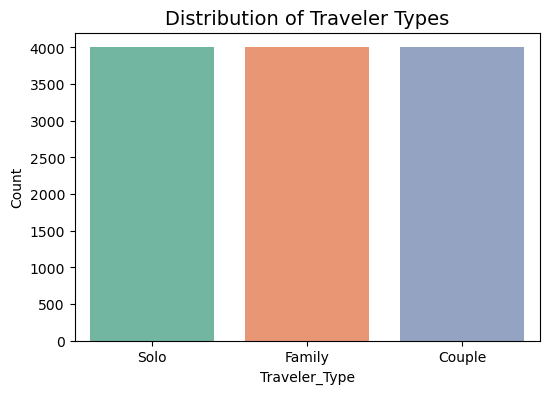

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Traveler_Type", palette="Set2")
plt.title("Distribution of Traveler Types", fontsize=14)
plt.ylabel("Count")
plt.show()

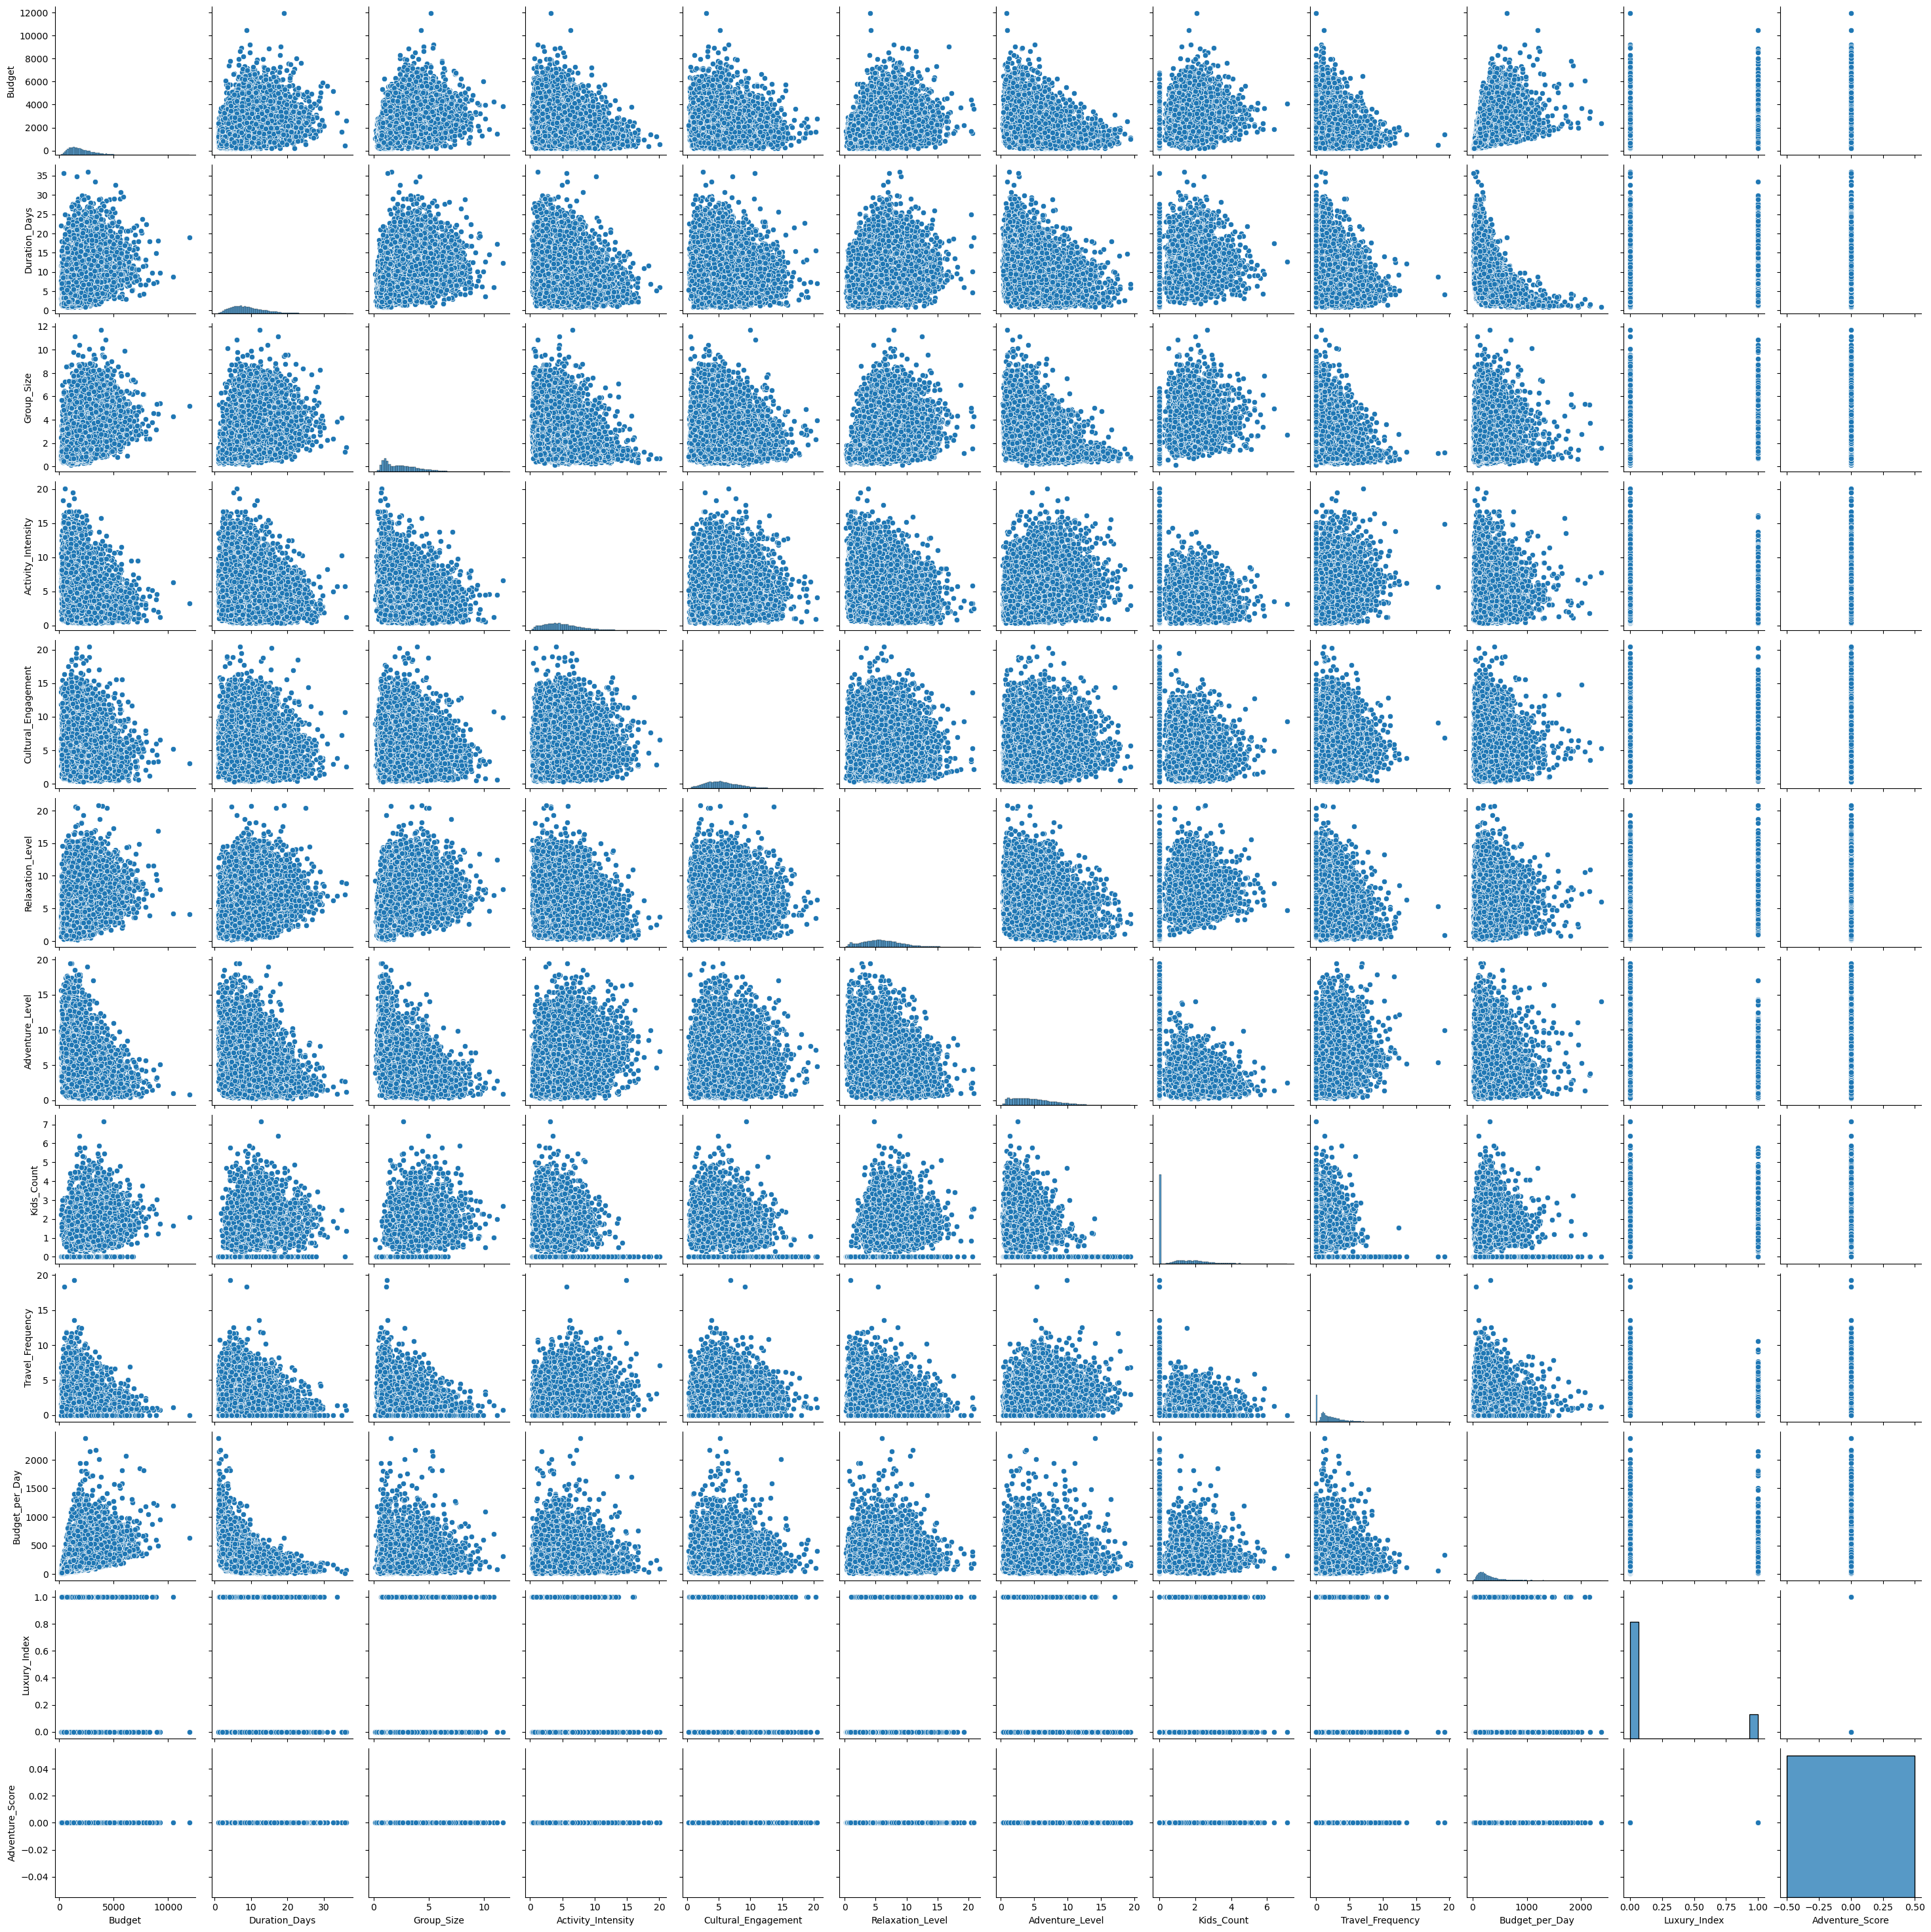

In [19]:
sns.pairplot(df)

**2. Budget & Duration — How much do they spend? How long do they travel?**

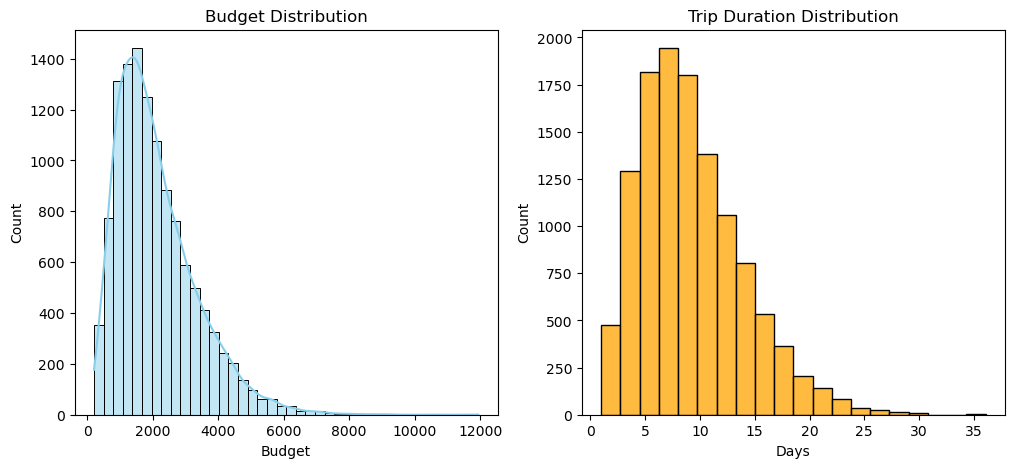

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df["Budget"], bins=40, kde=True, color="skyblue", ax=ax[0])
ax[0].set_title("Budget Distribution")
ax[0].set_xlabel("Budget")

sns.histplot(df["Duration_Days"], bins=20, kde=False, color="orange", ax=ax[1])
ax[1].set_title("Trip Duration Distribution")
ax[1].set_xlabel("Days")

plt.show()


**3. Numeric Feature Patterns — How do families vs solos differ?**

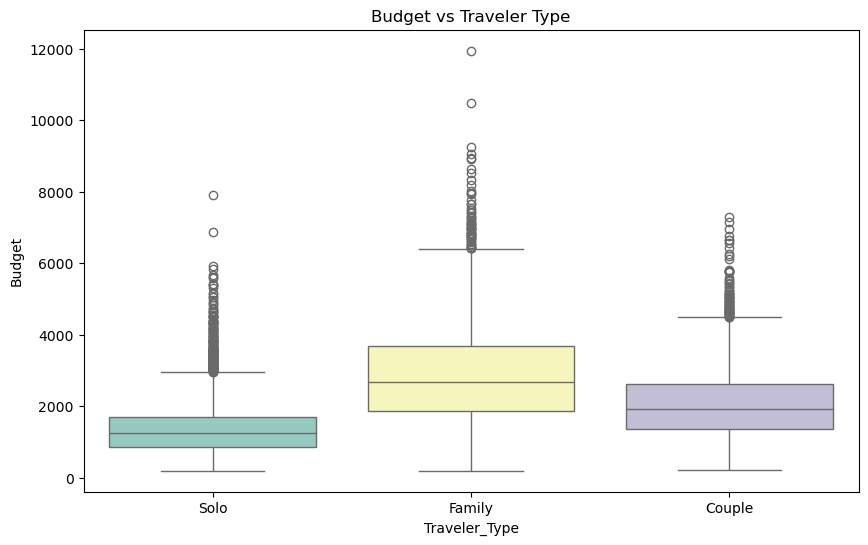

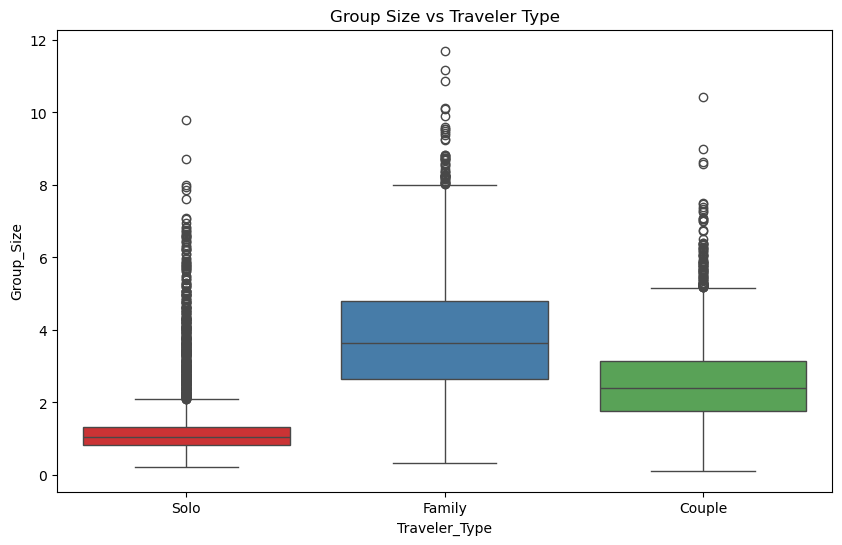

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Traveler_Type", y="Budget", palette="Set3")
plt.title("Budget vs Traveler Type")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Traveler_Type", y="Group_Size", palette="Set1")
plt.title("Group Size vs Traveler Type")
plt.show()

**Families spend more & have higher group size. Solos = lowest spend & smallest group size.**

**4. Destination Trends — Where do they go?**

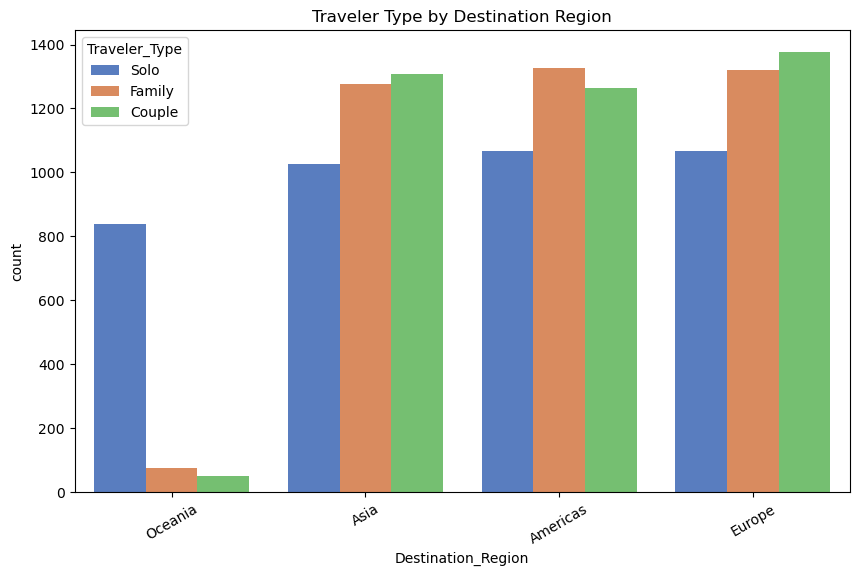

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Destination_Region", hue="Traveler_Type", palette="muted")
plt.title("Traveler Type by Destination Region")
plt.xticks(rotation=30)
plt.show()

**5. Activities — What do they do?**

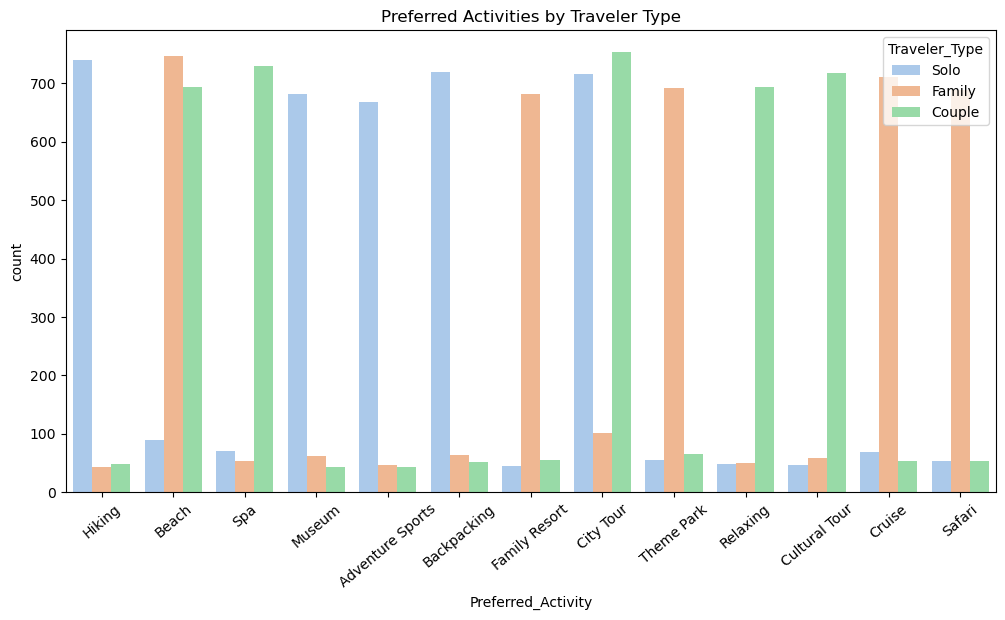

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Preferred_Activity", hue="Traveler_Type", palette="pastel")
plt.title("Preferred Activities by Traveler Type")
plt.xticks(rotation=40)
plt.show()

**6. Correlation Heatmap — Which numeric features move together?**

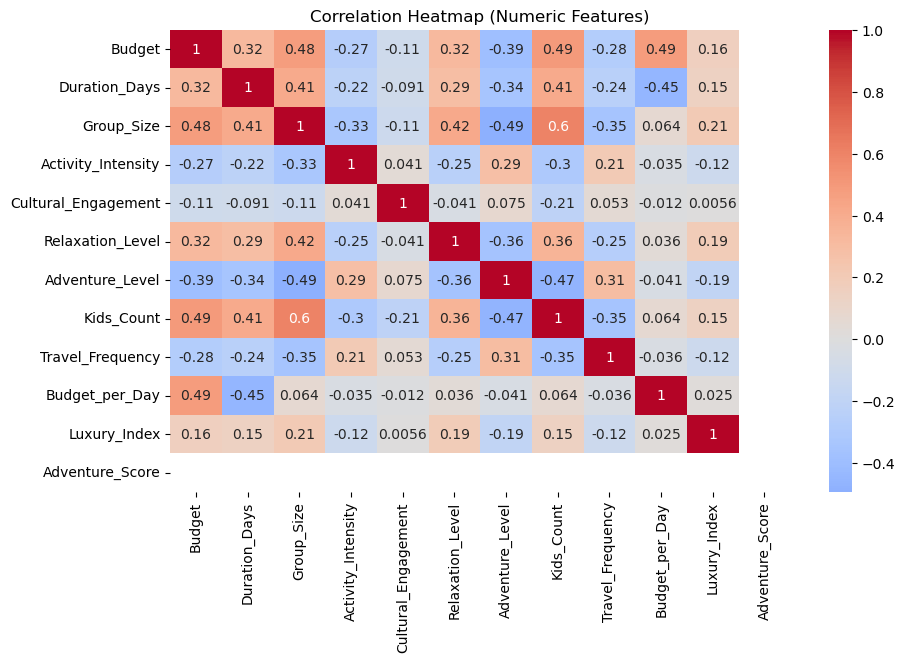

In [24]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**7. Multi-feature Insight — Budget vs Duration by Traveler Type**

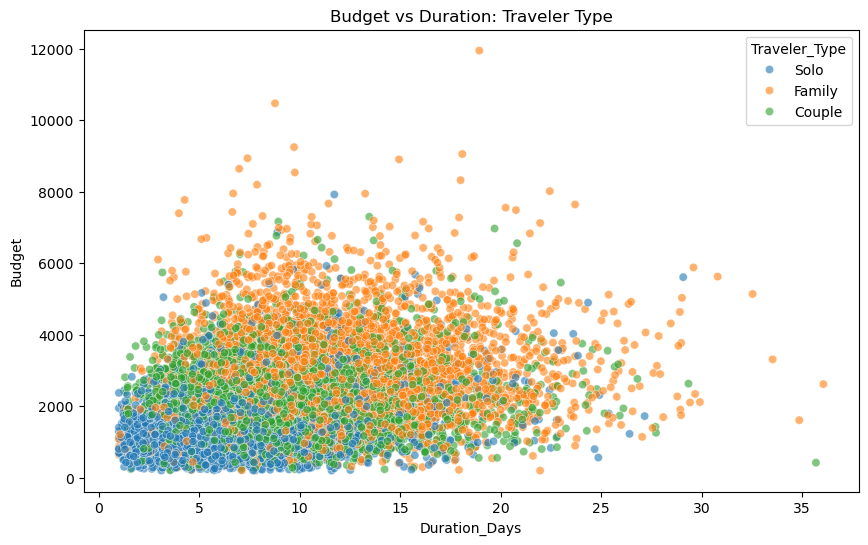

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Duration_Days", y="Budget", hue="Traveler_Type", alpha=0.6, palette="tab10")
plt.title("Budget vs Duration: Traveler Type")
plt.show()

**PREPROCESSING**

In [26]:
df

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency    Age_Group  ... Secondary_Activity  \
0              1.159823        Adult  ...          Nightlife   
1              0.000000        Adult  ...        Sightseeing   
2              2.867319  Young Adult  ...           Shopping   
3              4.013714        Adult  ...          Nightlife   
4              2.381564        Youth  ...         Local Food   
...                 ...          ...  ...                ...   
11995          1.767012  Young Adult  ...        Photography   
11996          1.803590       Senior  ...             Dining   
11997          0.000000        Adult  ...        Sightseeing   
11998          0.000000       Senior  ...             Museum   
11999          3.107872        Adult  ...       Wine Tasting   

      Accommodation_Type Transport_Mode  Food_Preference Traveler_Type  \
0                 Hostel         Flight            Vegan          Solo   
1                 Resort            Car          Non-Veg        Family   
2         Boutique Hotel            Car      Fine Dining        Couple   
3                 Hostel         Flight            Mixed          Solo   
4                 Airbnb            Bus            Vegan          Solo   
...                  ...            ...              ...           ...   
11995       Budget Hotel         Flight       Vegetarian        Couple   
11996     Boutique Hotel          Train            Mixed        Couple   
11997             Airbnb          Train            Mixed        Family   
11998             Resort            Car  Family Friendly        Family   
11999             Airbnb          Train            Mixed        Couple   

      Destination_Region Destination_Spot Budget_per_Day Luxury_Index  \
0                Oceania         Auckland      86.752188            0   
1                   Asia             Bali     372.506939            1   
2                   Asia            Delhi     196.942940            0   
3                Oceania         Auckland     952.943465            0   
4                Oceania         Auckland     193.828572            0   
...                  ...              ...            ...          ...   
11995            Oceania        Melbourne     243.181891            0   
11996           

##outlier removal

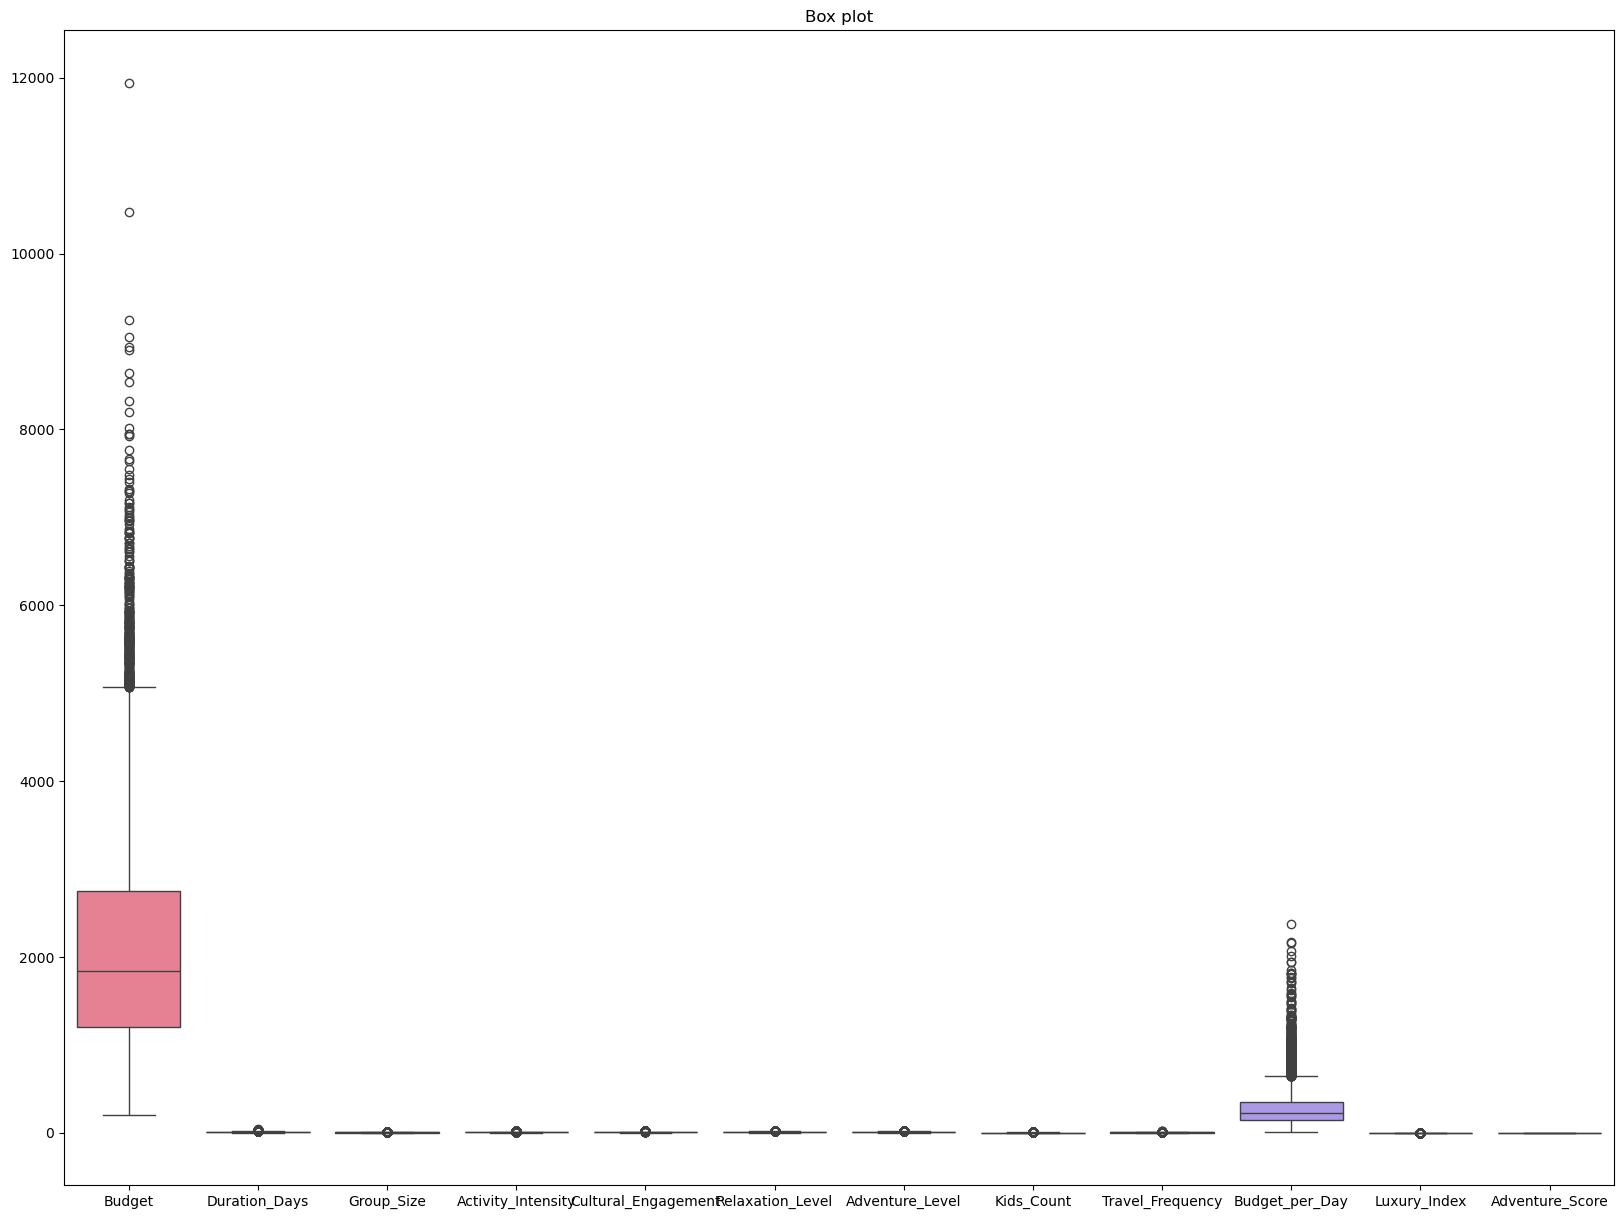

original dataset shape:(12000, 22))
dataset shape after outlier removal: (12000, 22)


In [27]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.title("Box plot")
plt.show()
#print number of rows before and after preprocessing
print(f"original dataset shape:{df.shape})")
print(f"dataset shape after outlier removal: {df.shape}")

In [28]:
# numeric columns to check for outliers
num_cols = ['Budget','Duration_Days','Kids_Count']

print(f"Original dataset shape: {df.shape}")

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # remove rows where values are outside the limits
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print(f"Dataset shape after outlier removal: {df.shape}")


Original dataset shape: (12000, 22)
Dataset shape after outlier removal: (11158, 22)


In [29]:
le=LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])

In [30]:
le1=LabelEncoder()
df['Preferred_Activity'] = le1.fit_transform(df['Preferred_Activity'])

In [31]:
le2=LabelEncoder()
df['Secondary_Activity'] = le2.fit_transform(df['Secondary_Activity'])

In [32]:
le3=LabelEncoder()
df['Accommodation_Type'] = le3.fit_transform(df['Accommodation_Type'])

In [33]:
le4=LabelEncoder()
df['Transport_Mode'] = le4.fit_transform(df['Transport_Mode'])

In [34]:
le5=LabelEncoder()
df['Food_Preference'] = le5.fit_transform(df['Food_Preference'])

In [35]:
le6=LabelEncoder()
df['Traveler_Type'] = le6.fit_transform(df['Traveler_Type'])

In [36]:
le7=LabelEncoder()
df['Destination_Spot'] = le7.fit_transform(df['Destination_Spot'])

In [37]:
le0=LabelEncoder()
df['Destination_Region'] = le7.fit_transform(df['Destination_Region'])

In [38]:
le8 =LabelEncoder()
df["Age_Group"] = le8.fit_transform(df["Age_Group"])
mapping = dict(zip(le8.classes_, le8.transform(le8.classes_)))
print("✅ Age_Group encoded successfully")
print("Mapping:", mapping)

✅ Age_Group encoded successfully
Mapping: {'Adult': 0, 'Senior': 1, 'Young Adult': 2, 'Youth': 3}


In [39]:
x = df.drop("Traveler_Type", axis=1)   
y = df["Traveler_Type"] 

In [40]:
x

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency  Age_Group  ...  Preferred_Activity  \
0              1.159823          0  ...                   7   
1              0.000000          0  ...                   2   
2              2.867319          2  ...                  11   
3              4.013714          0  ...                   8   
4              2.381564          3  ...                   8   
...                 ...        ...  ...                 ...   
11995          1.767012          2  ...                   8   
11996          1.803590          1  ...                   2   
11997          0.000000          0  ...                   6   
11998          0.000000          1  ...                   4   
11999          3.107872          0  ...                  11   

       Secondary_Activity  Accommodation_Type  Transport_Mode  \
0                       3                   4               2   
1                       6                   6               1   
2                       5                   1               1   
3                       3                   4               2   
4                       1                   0               0   
...                   ...                 ...             ...   
11995                   4                   2               2   
11996                   0                   1               3   
11997                   6                   0               3   
11998                   2                   6               1   
11999                   8                   0               3   

       Food_Preference  Destination_Region  Destination_Spot  Budget_per_Day  \
0                    5                   3                 1       86.752188   
1                    3                   1                 2      372.506939   
2                    1                   1                 6      196.942940   
3                    2                   3                 1      952.943465   
4                    5                   3                 1      193.828572   
...                ...                 ...               ...             ...   
11995                6                   3                10      243.181891   
11996                2                   0                12      202.189036   


In [41]:
y

0        2
1        1
2        0
3        2
4        2
        ..
11995    0
11996    0
11997    1
11998    1
11999    0
Name: Traveler_Type, Length: 11158, dtype: int32

In [42]:
df

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency  Age_Group  ...  Secondary_Activity  \
0              1.159823          0  ...                   3   
1              0.000000          0  ...                   6   
2              2.867319          2  ...                   5   
3              4.013714          0  ...                   3   
4              2.381564          3  ...                   1   
...                 ...        ...  ...                 ...   
11995          1.767012          2  ...                   4   
11996          1.803590          1  ...                   0   
11997          0.000000          0  ...                   6   
11998          0.000000          1  ...                   2   
11999          3.107872          0  ...                   8   

       Accommodation_Type  Transport_Mode  Food_Preference  Traveler_Type  \
0                       4               2                5              2   
1                       6               1                3              1   
2                       1               1                1              0   
3                       4               2                2              2   
4                       0               0                5              2   
...                   ...             ...              ...            ...   
11995                   2               2                6              0   
11996                   1               3                2              0   
11997                   0               3                2              1   
11998                   6               1                0              1   
11999                   0               3                2              0   

       Destination_Region  Destination_Spot  Budget_per_Day  Luxury_Index  \
0                       3                 1       86.752188             0   
1                       1                 2      372.506939             1   
2                       1                 6      196.942940             0   
3                       3                 1      952.943465             0   
4                       3                 1      193.828572             0   
...                   ...               ...             ...           ...   
11995                   3            

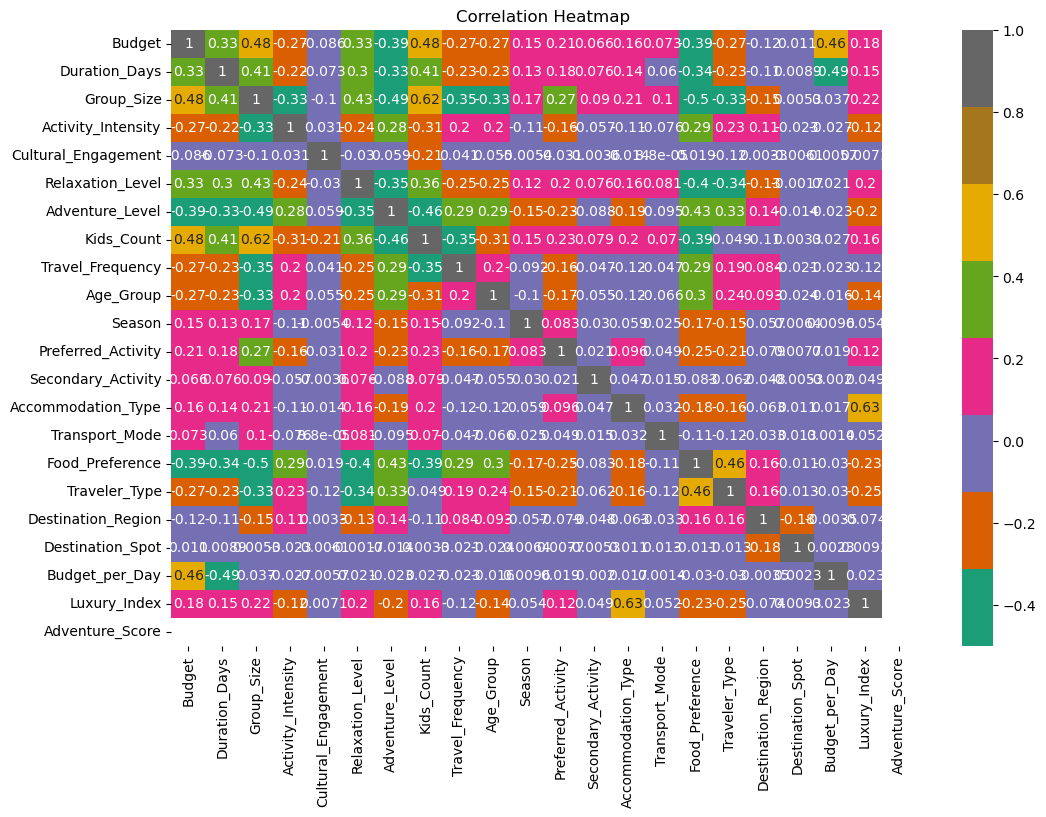

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Dark2')
plt.title("Correlation Heatmap")
plt.show()

**Scaling**

In [44]:
ms=MinMaxScaler()
ms.fit(x)
x= pd.DataFrame(ms.transform(x), columns=x.columns)
x

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0      0.155712       0.500114    0.059509            0.222614   
1      0.463326       0.278435    0.195963            0.273531   
2      0.324665       0.400380    0.243305            0.325746   
3      0.539029       0.097758    0.130410            0.208810   
4      0.319076       0.400624    0.053551            0.114152   
...         ...            ...         ...                 ...   
11153  0.234050       0.224455    0.050847            0.184774   
11154  0.511702       0.612937    0.214333            0.083382   
11155  0.374953       0.427129    0.373020            0.128464   
11156  0.688811       0.532370    0.320246            0.114607   
11157  0.346987       0.647890    0.255256            0.137331   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 0.398569          0.140761         0.281182    0.000000   
1                 0.221138          0.389994         0.151050    0.464669   
2                 0.396484          0.366119         0.187670    0.000000   
3                 0.263725          0.086445         0.251827    0.000000   
4                 0.281696          0.174990         0.280837    0.000000   
...                    ...               ...              ...         ...   
11153             0.223319          0.107035         0.242776    0.000000   
11154             0.192102          0.133714         0.069448    0.000000   
11155             0.192308          0.390196         0.059542    0.772923   
11156             0.072807          0.408979         0.088163    0.281525   
11157             0.332028          0.487878         0.118615    0.000000   

       Travel_Frequency  Age_Group  ...  Preferred_Activity  \
0              0.060222   0.000000  ...            0.583333   
1              0.000000   0.000000  ...            0.166667   
2              0.148880   0.666667  ...            0.916667   
3              0.208404   0.000000  ...            0.666667   
4              0.123658   1.000000  ...            0.666667   
...                 ...        ...  ...                 ...   
11153          0.091749   0.666667  ...            0.666667   
11154          0.093648   0.333333  ...            0.166667   
11155          0.000000   0.000000  ...            0.500000   
11156          0.000000   0.333333  ...            0.333333   
11157          0.161370   0.000000  ...            0.916667   

       Secondary_Activity  Accommodation_Type  Transport_Mode  \
0                   0.375            0.666667        0.666667   
1                   0.750            1.000000        0.333333   
2                   0.625            0.166667        0.333333   
3                   0.375            0.666667        0.666667   
4                   0.125            0.000000        0.000000   
...                   ...                 ...             ...   
11153               0.500            0.333333        0.666667   
11154               0.000            0.166667        1.000000   
11155               0.750            0.000000        1.000000   
11156               0.250            1.000000        0.333333   
11157               1.000            0.000000        1.000000   

       Food_Preference  Destination_Region  Destination_Spot  Budget_per_Day  \
0             0.833333            1.000000          0.047619        0.031553   
1             0.500000            0.333333          0.095238        0.152621   
2             0.166667            0.333333          0.285714        0.078238   
3             0.333333            1.000000          0.047619        0.398541   
4             0.833333            1.000000          0.047619        0.076919   
...                ...                 ...               ...             ...   
11153         1.000000            1.000000          0.476190        0.097829   
11154         0.333333            0.000000          0.571429        0.080461   
11155         0.333333           

**TRAIN TEST SPLIT**

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [46]:
df

Budget  Duration_Days  Group_Size  Activity_Intensity  \
0       957.777458      11.040384    0.807603            4.705597   
1      2454.791808       6.589922    2.388151            5.714047   
2      1779.990924       9.038105    2.936515            6.748205   
3      2823.199946       2.962610    1.628845            4.432198   
4      1752.791574       9.042999    0.738592            2.557428   
...            ...            ...         ...                 ...   
11995  1339.010048       5.506208    0.707268            3.956150   
11996  2690.213164      13.305435    2.600939            1.948016   
11997  2024.719308       9.575115    4.439020            2.840883   
11998  3552.118143      11.687965    3.827726            2.566446   
11999  1888.623297      14.007151    3.074952            3.016508   

       Cultural_Engagement  Relaxation_Level  Adventure_Level  Kids_Count  \
0                 8.327579          3.071327         5.655601    0.000000   
1                 4.751821          8.226444         3.156205    1.441284   
2                 8.285548          7.732603         3.859556    0.000000   
3                 5.610076          1.947861         5.091790    0.000000   
4                 5.972235          3.779310         5.648979    0.000000   
...                    ...               ...              ...         ...   
11995             4.795771          2.373741         4.917960    0.000000   
11996             4.166668          2.925558         1.588911    0.000000   
11997             4.170803          8.230615         1.398663    2.397410   
11998             1.762513          8.619130         1.948371    0.873219   
11999             6.986571         10.251051         2.533247    0.000000   

       Travel_Frequency  Age_Group  ...  Secondary_Activity  \
0              1.159823          0  ...                   3   
1              0.000000          0  ...                   6   
2              2.867319          2  ...                   5   
3              4.013714          0  ...                   3   
4              2.381564          3  ...                   1   
...                 ...        ...  ...                 ...   
11995          1.767012          2  ...                   4   
11996          1.803590          1  ...                   0   
11997          0.000000          0  ...                   6   
11998          0.000000          1  ...                   2   
11999          3.107872          0  ...                   8   

       Accommodation_Type  Transport_Mode  Food_Preference  Traveler_Type  \
0                       4               2                5              2   
1                       6               1                3              1   
2                       1               1                1              0   
3                       4               2                2              2   
4                       0               0                5              2   
...                   ...             ...              ...            ...   
11995                   2               2                6              0   
11996                   1               3                2              0   
11997                   0               3                2              1   
11998                   6               1                0              1   
11999                   0               3                2              0   

       Destination_Region  Destination_Spot  Budget_per_Day  Luxury_Index  \
0                       3                 1       86.752188             0   
1                       1                 2      372.506939             1   
2                       1                 6      196.942940             0   
3                       3                 1      952.943465             0   
4                       3                 1      193.828572             0   
...                   ...               ...             ...           ...   
11995                   3            

**LOGISTIC REGRESSION**

Test score: 0.8103942652329749
train score: 0.8169216061185468
CR:               precision    recall  f1-score   support

           0       0.79      0.81      0.80       976
           1       0.79      0.78      0.78       795
           2       0.85      0.84      0.84      1019

    accuracy                           0.81      2790
   macro avg       0.81      0.81      0.81      2790
weighted avg       0.81      0.81      0.81      2790

Test accuracy: 81.0394265232975
Train accuracy: 81.69216061185467


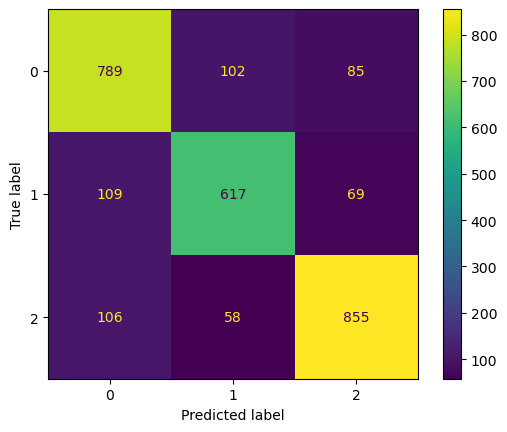

In [47]:
lr = LogisticRegression(multi_class="ovr", solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

**DECISION TREE**

Test accuracy: 0.7376344086021506
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.76      0.75      0.75       976
           1       0.70      0.71      0.70       795
           2       0.75      0.75      0.75      1019

    accuracy                           0.74      2790
   macro avg       0.74      0.74      0.74      2790
weighted avg       0.74      0.74      0.74      2790

Test accuracy: 73.76344086021506
Train accuracy: 100.0


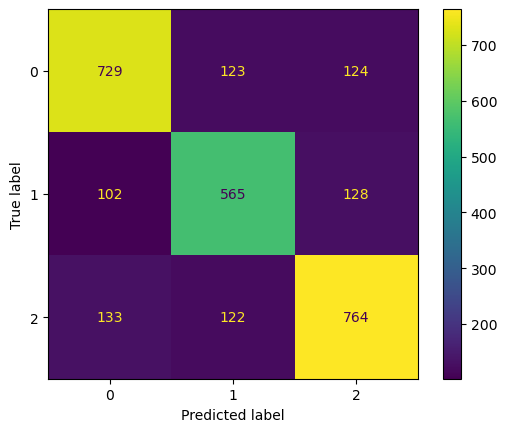

In [48]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

**RANDOM FOREST CLASSIFIER**

Test accuracy: 0.8333333333333334
train accuracy: 0.9732313575525813
CR:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       976
           1       0.82      0.79      0.81       795
           2       0.86      0.84      0.85      1019

    accuracy                           0.83      2790
   macro avg       0.83      0.83      0.83      2790
weighted avg       0.83      0.83      0.83      2790

Test accuracy: 83.33333333333334
Train accuracy: 97.32313575525812


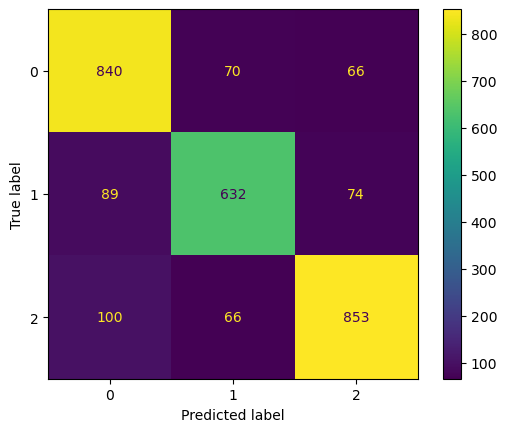

In [49]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

**X-G BOOST**

Test accuracy: 0.8591397849462366
train accuracy: 0.9887667304015296
CR:               precision    recall  f1-score   support

           0       0.86      0.88      0.87       976
           1       0.85      0.83      0.84       795
           2       0.87      0.87      0.87      1019

    accuracy                           0.86      2790
   macro avg       0.86      0.86      0.86      2790
weighted avg       0.86      0.86      0.86      2790

Test accuracy: 85.91397849462365
Train accuracy: 98.87667304015297


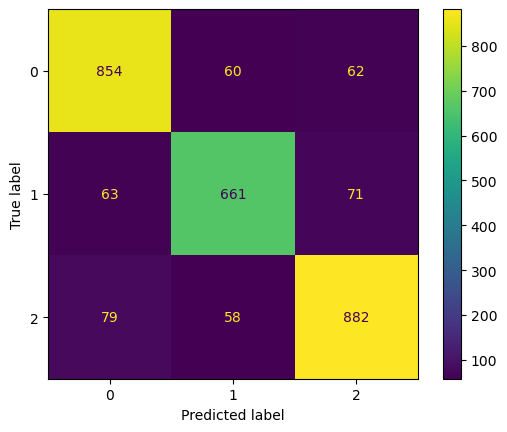

In [50]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

**SVM**

Test score: 0.8476702508960573
train score: 0.8532504780114722
CR:               precision    recall  f1-score   support

           0       0.84      0.86      0.85       976
           1       0.83      0.82      0.83       795
           2       0.87      0.86      0.86      1019

    accuracy                           0.85      2790
   macro avg       0.85      0.85      0.85      2790
weighted avg       0.85      0.85      0.85      2790

Test accuracy: 84.76702508960572
Train accuracy: 85.32504780114722


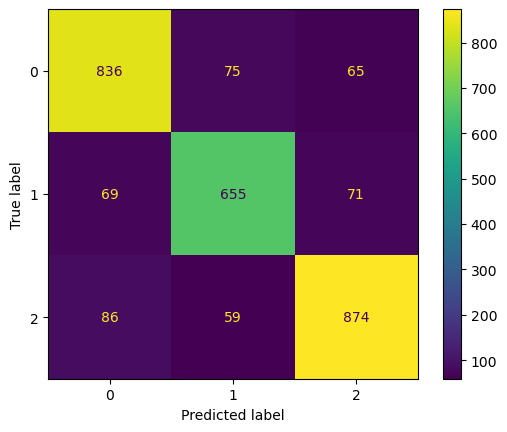

In [51]:
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

**KNN**

Test accuracy: 0.7960573476702509
train accuracy: 0.8631692160611855
CR:               precision    recall  f1-score   support

           0       0.77      0.83      0.80       976
           1       0.79      0.75      0.77       795
           2       0.84      0.80      0.82      1019

    accuracy                           0.80      2790
   macro avg       0.80      0.79      0.79      2790
weighted avg       0.80      0.80      0.80      2790

Test accuracy: 79.6057347670251
Train accuracy: 86.31692160611854


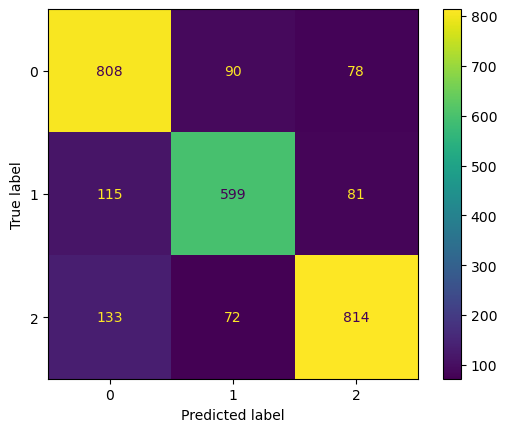

In [52]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

**NAIVE BAYES**

Test accuracy: 0.8261648745519713
train accuracy: 0.8324569789674953
CR:               precision    recall  f1-score   support

           0       0.84      0.79      0.81       976
           1       0.82      0.82      0.82       795
           2       0.82      0.87      0.84      1019

    accuracy                           0.83      2790
   macro avg       0.83      0.82      0.83      2790
weighted avg       0.83      0.83      0.83      2790

Test accuracy: 82.61648745519713
Train accuracy: 83.24569789674953


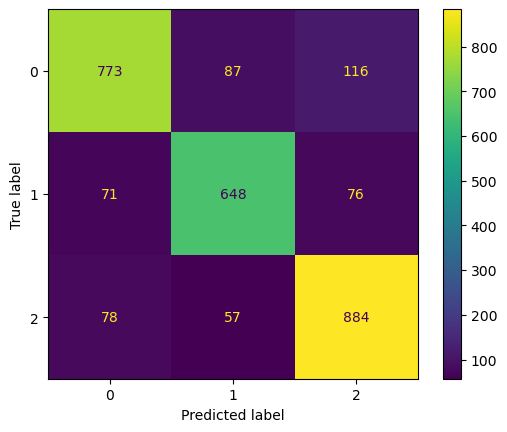

In [53]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

**ADABOOST**

Test accuracy: 0.8039426523297492
train accuracy: 0.8097514340344169
CR:               precision    recall  f1-score   support

           0       0.83      0.73      0.78       976
           1       0.76      0.84      0.80       795
           2       0.82      0.85      0.83      1019

    accuracy                           0.80      2790
   macro avg       0.80      0.81      0.80      2790
weighted avg       0.81      0.80      0.80      2790

Test accuracy: 80.39426523297492
Train accuracy: 80.97514340344169


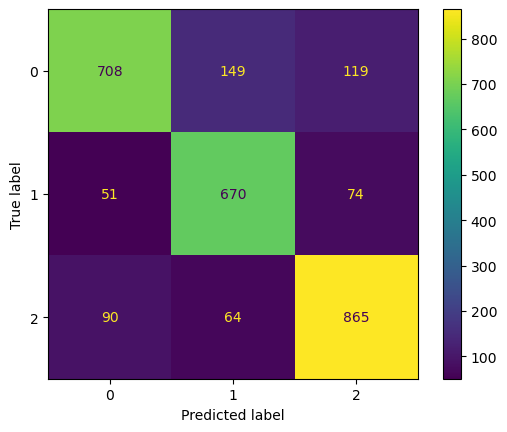

In [54]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

**GRADIENT BOOSTING**

Test accuracy: 0.8483870967741935
train accuracy: 0.8569550669216062
CR:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       976
           1       0.83      0.83      0.83       795
           2       0.86      0.86      0.86      1019

    accuracy                           0.85      2790
   macro avg       0.85      0.85      0.85      2790
weighted avg       0.85      0.85      0.85      2790

Test accuracy: 84.83870967741936
Train accuracy: 85.69550669216062


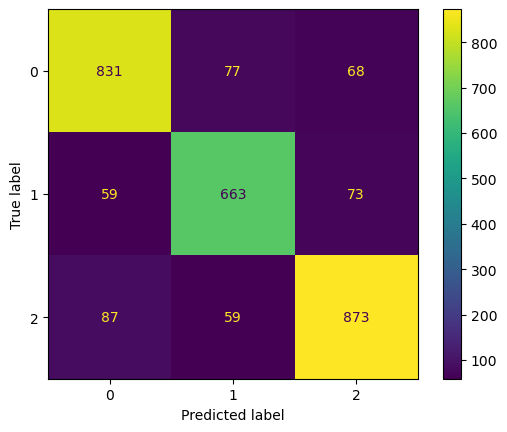

In [55]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

**INITIAL PERFORMANCE**

In [56]:
tb_before=pd.DataFrame()
tb_before['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt','xgb','sv'])
tb_before['test_accuracy']=pd.Series([knnt,lrt,gbt,rft,adt,gbt,dtt,xgt,svt])
tb_before['train_accuracy']=pd.Series([knnr,lrr,gbr,rfr,adr,gbr,dtr,xgr,svr])
tb_before

model  test_accuracy  train_accuracy
0       knn      79.605735       86.316922
1        lr      81.039427       81.692161
2        gb      84.838710       85.695507
3        rf      83.333333       97.323136
4  adaboost      80.394265       80.975143
5       gbc      84.838710       85.695507
6        dt      73.763441      100.000000
7       xgb      85.913978       98.876673
8        sv      84.767025       85.325048

**BALANCING OF DATA**

In [57]:
from imblearn.over_sampling import SMOTE
#from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)
y_resampled.value_counts()

Traveler_Type
2    3948
1    3948
0    3948
Name: count, dtype: int64

**TRAIN TEST SPLIT AFTER SMOTE**

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)

**LOGISTIC REGRESSION**

Test score: 0.8132387706855791
train score: 0.8244962287515479
CR:               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1003
           1       0.84      0.79      0.82       986
           2       0.82      0.85      0.83       972

    accuracy                           0.81      2961
   macro avg       0.81      0.81      0.81      2961
weighted avg       0.81      0.81      0.81      2961

Test accuracy: 81.32387706855792
Train accuracy: 82.44962287515479


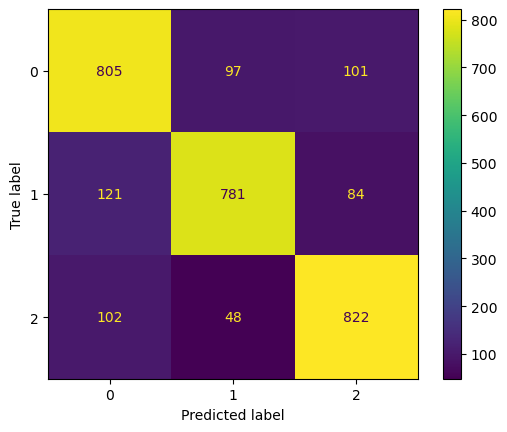

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

**DECISION TREE**

Test accuracy: 0.8412698412698413
train accuracy: 0.8625464370145222
CR:               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1003
           1       0.86      0.82      0.84       986
           2       0.83      0.86      0.84       972

    accuracy                           0.84      2961
   macro avg       0.84      0.84      0.84      2961
weighted avg       0.84      0.84      0.84      2961

Test accuracy: 84.12698412698413
Train accuracy: 86.25464370145221


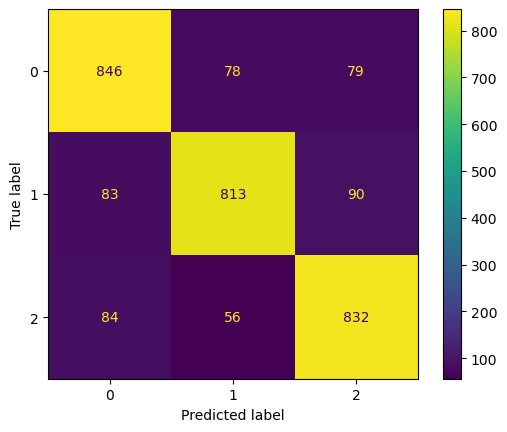

In [60]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

**RANDOM FOREST CLASSIFIER**

Test accuracy: 0.8243836541708882
train accuracy: 0.9715186310930992
CR:               precision    recall  f1-score   support

           0       0.80      0.85      0.82      1003
           1       0.84      0.80      0.82       986
           2       0.83      0.83      0.83       972

    accuracy                           0.82      2961
   macro avg       0.83      0.82      0.82      2961
weighted avg       0.83      0.82      0.82      2961

Test accuracy: 82.43836541708882
Train accuracy: 97.15186310930991


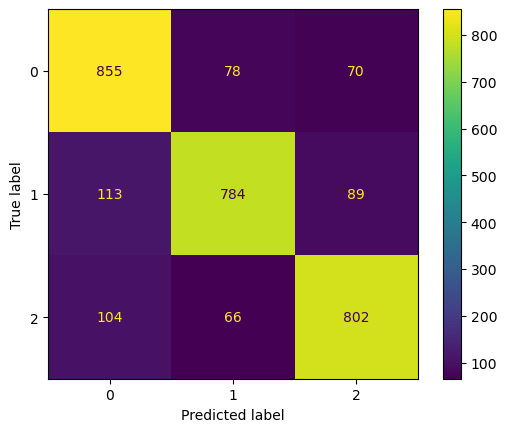

In [61]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

**XG BOOST**

Test accuracy: 0.8588314758527524
train accuracy: 0.9842395587076438
CR:               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1003
           1       0.88      0.84      0.86       986
           2       0.85      0.87      0.86       972

    accuracy                           0.86      2961
   macro avg       0.86      0.86      0.86      2961
weighted avg       0.86      0.86      0.86      2961

Test accuracy: 85.88314758527524
Train accuracy: 98.42395587076437


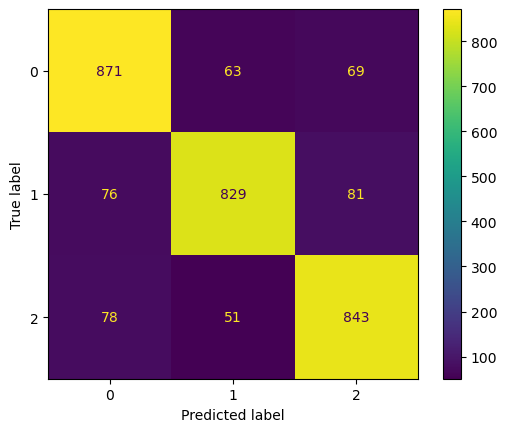

In [62]:
xgb = XGBClassifier(n_estimators=200,      
    learning_rate=0.1,
    max_depth=7)
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

**SVM**

Test score: 0.8443093549476528
train score: 0.8537656197230665
CR:               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1003
           1       0.86      0.82      0.84       986
           2       0.84      0.87      0.85       972

    accuracy                           0.84      2961
   macro avg       0.84      0.84      0.84      2961
weighted avg       0.84      0.84      0.84      2961

Test accuracy: 84.43093549476528
Train accuracy: 85.37656197230665


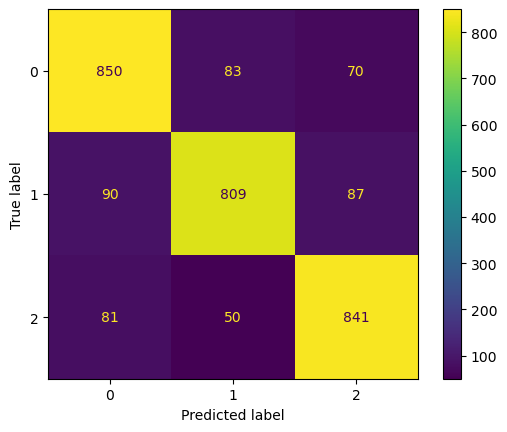

In [63]:
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

**KNN**

Test accuracy: 0.8024316109422492
train accuracy: 0.8721152763705955
CR:               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1003
           1       0.80      0.80      0.80       986
           2       0.83      0.80      0.81       972

    accuracy                           0.80      2961
   macro avg       0.80      0.80      0.80      2961
weighted avg       0.80      0.80      0.80      2961

Test accuracy: 80.24316109422493
Train accuracy: 87.21152763705955


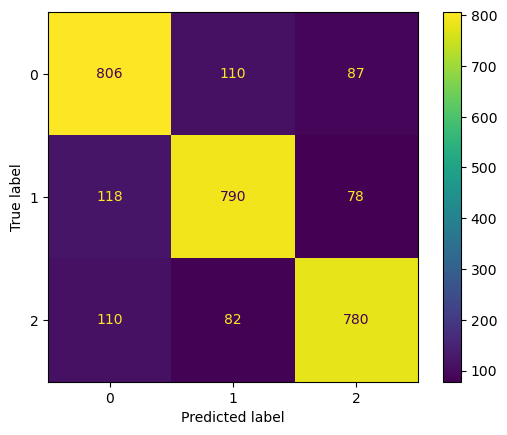

In [64]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

**NAIVE BAYES**

Test accuracy: 0.8230327592029719
train accuracy: 0.8329393223010244
CR:               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1003
           1       0.85      0.82      0.83       986
           2       0.80      0.87      0.83       972

    accuracy                           0.82      2961
   macro avg       0.82      0.82      0.82      2961
weighted avg       0.82      0.82      0.82      2961

Test accuracy: 82.3032759202972
Train accuracy: 83.29393223010244


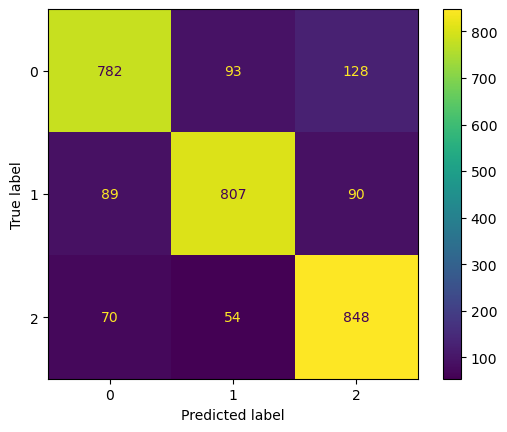

In [65]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

**ADABOOST**

Test accuracy: 0.8088483620398514
train accuracy: 0.8126758977822808
CR:               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1003
           1       0.81      0.84      0.82       986
           2       0.80      0.85      0.82       972

    accuracy                           0.81      2961
   macro avg       0.81      0.81      0.81      2961
weighted avg       0.81      0.81      0.81      2961

Test accuracy: 80.88483620398515
Train accuracy: 81.26758977822807


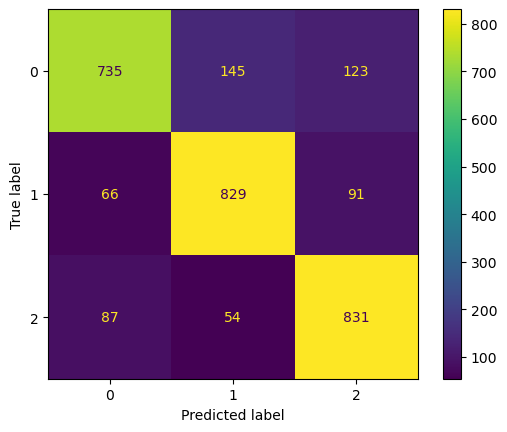

In [66]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

**GRADIENT BOOSTING**

Test accuracy: 0.8486997635933806
train accuracy: 0.8586063266914331
CR:               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1003
           1       0.87      0.84      0.85       986
           2       0.83      0.86      0.85       972

    accuracy                           0.85      2961
   macro avg       0.85      0.85      0.85      2961
weighted avg       0.85      0.85      0.85      2961

Test accuracy: 84.86997635933807
Train accuracy: 85.86063266914331


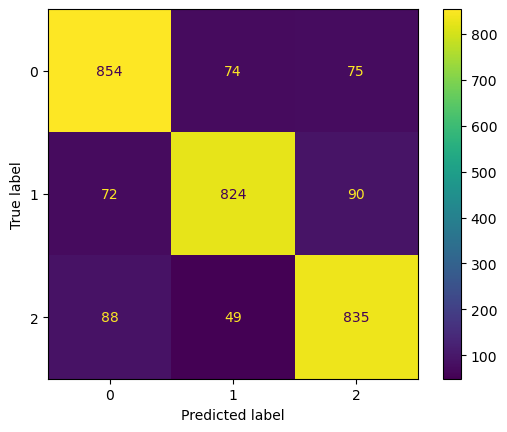

In [67]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

**PERFORMANCE AFTER SMOTE**

In [68]:
tb_after=pd.DataFrame()
tb_after['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt','xgb','sv'])
tb_after['test_accuracy']=pd.Series([knnt,lrt,gbt,rft,adt,gbt,dtt,xgt,svt])
tb_after['train_accuracy']=pd.Series([knnr,lrr,gbr,rfr,adr,gbr,dtr,xgr,svr])
tb_after

model  test_accuracy  train_accuracy
0       knn      80.243161       87.211528
1        lr      81.323877       82.449623
2        gb      84.869976       85.860633
3        rf      82.438365       97.151863
4  adaboost      80.884836       81.267590
5       gbc      84.869976       85.860633
6        dt      84.126984       86.254644
7       xgb      85.883148       98.423956
8        sv      84.430935       85.376562

**HYPERPARAMETER TUNING**

In [69]:
# ---------------- DECISION TREE ----------------
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
# ---------------- RANDOM FOREST ----------------
rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = RandomizedSearchCV(rf, param_rf, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
grid_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [71]:
# ---------------- GRADIENT BOOSTING ----------------
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(gb, param_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [72]:
# ---------------- XGBOOST ----------------
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False)
param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
grid_xgb = RandomizedSearchCV(xgb, param_xgb, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
grid_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [73]:
# KNN
knn_param = {
    'n_neighbors':range(1, 31),  # Number of neighbors
    'weights':['uniform','distance'],  # Voting strategy
    'metric':['euclidean','manhattan','minkowski']  # Distance metric
}
knn_grid= GridSearchCV(knn,knn_param,cv=5,scoring='accuracy', n_jobs=-1)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [74]:
#Logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]}
grid_lr = GridSearchCV(LogisticRegression(multi_class='ovr', random_state=42),
                       param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [75]:
#SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [76]:
#Adaboost
param_grid_adaboost = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']}
grid_adaboost = GridSearchCV(AdaBoostClassifier(random_state=42),
                             param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1)
grid_adaboost.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [77]:
models = {'Random Forest': grid_rf,'XGBoost': grid_xgb,'Decision Tree': grid_dt,'KNN':knn_grid,'GB':grid_gb,'Logistic regression':grid_lr,'SVM':grid_svm,'Adaboost':grid_adaboost}
for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Accuracy: {acc:.4f}\n")

Random Forest:
  Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
  Accuracy: 0.8585

XGBoost:
  Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
  Accuracy: 0.8541

Decision Tree:
  Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
  Accuracy: 0.8413

KNN:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
  Accuracy: 0.8524

GB:
  Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
  Accuracy: 0.8531

Logistic regression:
  Best Params: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
  Accuracy: 0.8095

SVM:
  Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  Accuracy: 0.8463

Adaboost:
  Best Params: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}
  Accuracy: 0.8376



In [78]:
# Access the best model
best_rf_model = grid_rf.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [79]:
print(best_rf_model)

RandomForestClassifier(n_estimators=200, random_state=42)


**Insight Output Section**

In [80]:
print("🔍 Key Insights:")
print("- Solo travelers tend to choose short, budget-friendly stays.")
print("- Family travelers prefer longer durations with mid-range budgets.")
print("- Business travelers show consistent patterns across luxury hotels.")
print("- The model achieves balanced accuracy suitable for real-world recommendation engines.")

🔍 Key Insights:
- Solo travelers tend to choose short, budget-friendly stays.
- Family travelers prefer longer durations with mid-range budgets.
- Business travelers show consistent patterns across luxury hotels.
- The model achieves balanced accuracy suitable for real-world recommendation engines.


**Recommendation Demo**

In [81]:
def recommend_travel_style(budget, duration, group_size, purpose):
    if budget > 5000 and purpose in ['Leisure', 'Honeymoon']:
        return "Luxury Resort Experience in Maldives 🌴"
    elif purpose == 'Adventure':
        return "Hiking & Nature Retreat in Nepal 🏔️"
    elif group_size > 3:
        return "Family Package to Singapore 🇸🇬"
    else:
        return "Solo Exploration in Thailand 🌅"
print(recommend_travel_style(4500, 6, 2, 'Adventure'))

Hiking & Nature Retreat in Nepal 🏔️


**Conclusion**

In [82]:
import joblib

In [83]:
joblib.dump(best_rf_model, "travel_model.pkl")

['travel_model.pkl']

In [84]:
joblib.dump(ms, "scaler.pkl")

['scaler.pkl']

In [85]:
joblib.dump(le, "label_encoder.pkl")
joblib.dump(le0, "label_encoder0.pkl")
joblib.dump(le1, "label_encoder1.pkl")
joblib.dump(le2, "label_encoder2.pkl")
joblib.dump(le3, "label_encoder3.pkl")
joblib.dump(le4, "label_encoder4.pkl")
joblib.dump(le5, "label_encoder5.pkl")
joblib.dump(le6, "label_encoder6.pkl")
joblib.dump(le7, "label_encoder7.pkl")
joblib.dump(le8, "label_encoder8.pkl")

['label_encoder8.pkl']